## Load Packages

In [627]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



pd.set_option('display.max_columns', None)

## Load Data

In [626]:
train_url = 'https://storage.googleapis.com/home_credit_files/application_train.csv'
test_url = 'https://storage.googleapis.com/home_credit_files/application_test.csv'
bureau_url = 'https://storage.googleapis.com/home_credit_files/bureau.csv'
bureau_balance_url = 'https://storage.googleapis.com/home_credit_files/bureau_balance.csv'
POS_CASH_balance_url = 'https://storage.googleapis.com/home_credit_files/POS_CASH_balance.csv'
previous_application_url = 'https://storage.googleapis.com/home_credit_files/previous_application.csv'
installments_payments_url = 'https://storage.googleapis.com/home_credit_files/installments_payments.csv'

In [555]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

C:\Users\gbrown\AppData\Local\Temp\ipykernel_46420\474926630.py:1: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_url)


In [556]:
train_df['test'] = False 
train_df['train'] = True
test_df['test'] = True
test_df['train'] = False

In [557]:
y = train_df['TARGET']
train_X = train_df.drop(['TARGET'], axis = 1)

test_id = test_df['SK_ID_CURR']
test_X = test_df

full_df = pd.concat([train_X, test_X], axis=0)

In [558]:
full_df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,356255.000000,356255.000000,3.562550e+05,3.562550e+05,356219.000000,3.559770e+05,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,121014.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356253.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,162345.000000,3.555870e+05,286622.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,176307.000000,148671.000000,183392.000000,119949.000000,107895.000000,167175.000000,177848.000000,179914.000000,115147.000000,145411.000000,113276.000000,178353.000000,109394.000000,160489.000000,185200.000000,355205.000000,355205.000000,355205.000000,355205.000000,356254.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.000000,356255.00000,356255.000000,356255.000000,356255.000000,356255.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000,308687.000000
mean,278128.000000,0.414316,1.701161e+05,5.877674e+05,27425.560657,5.280200e+05,0.020917,-16041.248841,64317.231413,-4983.593527,-3002.071163,12.023741,0.999994,0.818498,0.200098,0.998170,0.278612,0.071213,2.151858,2.050506,2.028932,12.055749,0.015649,0.051371,0.040847,0.078076,0.229661,0.178824,0.501965,5.148900e-01,0.509350,0.118138,0.088673,0.977889,0.752283,0.045045,0.079819,0.150015,0.227331,0.232817,0.066454,0.101495,0.108089,0.008868,0.028503,0.114914,0.087750,0.977239,0.759452,0.042930,0.075346,0.145471,0.223315,0.228878,0.065092,0.106382,0.106641,0.008116,0.027183,0.118549,0.088178,0.977903,0.755548,0.

In [559]:
full_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

C:\Users\gbrown\AppData\Local\Temp\ipykernel_46420\801054104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)


## Function

In [560]:
def preprocess_dataframe(df):
    object_cols = df.select_dtypes(include='object').columns.to_list()
    for col in object_cols:
        df[col] = df[col].astype('category')

    category_cols = [col for col in df.columns if df[col].dtype == 'category']

    for col in category_cols:
        df[col], _ = pd.factorize(df[col])

    for col in category_cols:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

    return df

In [561]:
full_df = preprocess_dataframe(full_df)
print(full_df.dtypes.value_counts())
print(full_df.shape)

bool       154
float64     66
int64       39
Name: count, dtype: int64
(356255, 259)


## Bureau

In [562]:
bureau = pd.read_csv(bureau_url)
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [563]:
print(bureau.dtypes.value_counts())
print(bureau.shape)
bureau.head()

float64    8
int64      6
object     3
Name: count, dtype: int64
(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [564]:
bureau = preprocess_dataframe(bureau)
print(bureau.dtypes.value_counts())
print(bureau.shape)
bureau.head()

bool       23
float64     8
int64       6
Name: count, dtype: int64
(1716428, 37)


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_0,CREDIT_ACTIVE_1,CREDIT_ACTIVE_2,CREDIT_ACTIVE_3,CREDIT_CURRENCY_0,CREDIT_CURRENCY_1,CREDIT_CURRENCY_2,CREDIT_CURRENCY_3,CREDIT_TYPE_0,CREDIT_TYPE_1,CREDIT_TYPE_2,CREDIT_TYPE_3,CREDIT_TYPE_4,CREDIT_TYPE_5,CREDIT_TYPE_6,CREDIT_TYPE_7,CREDIT_TYPE_8,CREDIT_TYPE_9,CREDIT_TYPE_10,CREDIT_TYPE_11,CREDIT_TYPE_12,CREDIT_TYPE_13,CREDIT_TYPE_14
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [565]:
aggs = ['min', 'max', 'mean', 'var']
bureau_aggregations = {
        'DAYS_CREDIT': aggs,
        'DAYS_CREDIT_ENDDATE': aggs,
        'DAYS_CREDIT_UPDATE': aggs,
        'CREDIT_DAY_OVERDUE': aggs,
        'AMT_CREDIT_MAX_OVERDUE': aggs,
        'AMT_CREDIT_SUM': aggs,
        'AMT_CREDIT_SUM_DEBT': aggs,
        'AMT_CREDIT_SUM_OVERDUE': aggs,
        'AMT_CREDIT_SUM_LIMIT': aggs,
        'AMT_ANNUITY': aggs,
        'CNT_CREDIT_PROLONG': aggs
}

In [566]:
aggregated_bureau = bureau.groupby('SK_ID_CURR').agg(bureau_aggregations)

aggregated_bureau.columns = ['_'.join(col).strip() for col in aggregated_bureau.columns.values]

aggregated_bureau.reset_index(inplace=True)

aggregated_bureau

,SK_ID_CURR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_var,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_mean,DAYS_CREDIT_ENDDATE_var,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_var,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_var,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_mean,AMT_CREDIT_MAX_OVERDUE_var,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_var,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_var,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_mean,AMT_CREDIT_SUM_OVERDUE_var,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_LIMIT_var,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_var,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_mean,CNT_CREDIT_PROLONG_var
0,100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,1.066798e+06,-155,-6,-93.142857,5960.476190,0,0,0.0,0.0,NaN,NaN,NaN,NaN,85500.0,378000.00,2.076236e+05,1.501717e+10,0.0,373239.00,85240.928571,1.890230e+10,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.000000e+00,0.000,10822.5,3545.357143,2.304583e+07,0,0,0.000000,0.000000
1,100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,5.890424e+05,-1185,-7,-499.875000,268865.553571,0,0,0.0,0.0,0.0,5043.645,1681.029,5.584936e+06,0.0,450000.00,1.081319e+05,2.133807e+10,0.0,245781.00,49156.200000,1.208166e+10,0.0,0.0,0.0,0.0,0.0,31988.565,7997.14125,2.558171e+08,0.000,0.0,0.000000,0.000000e+00,0,0,0.000000,0.000000
2,100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,2.228364e+06,-2131,-43,-816.000000,824562.000000,0,0,0.0,0.0,0.0,0.000,0.000,0.000000e+00,22248.0,810000.00,2.543501e+05,1.385846e+11,0.0,0.00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,810000.000,202500.00000,1.640250e+11,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000
3,100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,2.268450e+04,-682,-382,-532.000000,45000.000000,0,0,0.0,0.0,0.0,0.000,0.000,NaN,94500.0,94537.80,9.451890e+04,7.144200e+02,0.0,0.00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.000000e+00,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000
4,100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,6.026013e+05,-121,-11,-54.333333,3433.333333,0,0,0.0,0.0,0.0,0.000,0.000,NaN,29826.0,568800.00,2.190420e+05,9.195354e+10,0.0,543087.00,189469.500000,9.394430e+10,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.000000e+00,0.000,4261.5,1420.500000,6.053461e+06,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-2713,-483,-1667.076923,407302.243590,-2499.0,1363.0,-1232.333333,9.556770e+05,-2498,-12,-1064.538462,439090.269231,0,0,0.0,0.0,0.0,18945.000,6147.000,7.724727e+07,43447.5,765000.00,2.841430e+05,4.671276e+10,0.0,163071.00,16307.100000,2.659215e+09,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.000000e+00,NaN,NaN,NaN,NaN,0,0,0.000000,0.000000
305807,456250,-1002,-760,-862.000000,15724.000000,-272.0,2340.0,1288.333333,1.899692e+06,-127,-23,-60.333333,3349.333333,0,0,0.0,0.0,0.0,0.000,0.000,0.000000e+00,450000.0,2153110.05,1.028820e+06,9.482994e+11,0.0,1840308.48,744013.365000,9.397606e+11,0.0,0.0,0.0,0.0,0.0,58268.385,19422.79500,1.131735e+09,27757.395,384147.0,154567.965000,3.967441e+10,0,0,0.000000,0.000000
305808,456253,-919,-713,-867.500000,10609.000000,-189.0,1113.0,280.500000,3.817530e+05,-701,-5,-253.250000,94436.250000,0,0,0.0,0.0,NaN,NaN,NaN,NaN,360000.0,2250000.00,9.900000e+05,7.276500e+11,0.0,1624797.00,448958.250000,6.209882e+11,0.0,0.0,0.0,0.0,0.0,0.000,0.00000,0.000000e+00,58369.500,58369.5,58369.500000,0.000000e+00,0,0,0.000000,0.000000
305809,456254,-1104,-1104,-1104.000000,NaN,-859.0,-859.0,-859.000

In [567]:
full_df = full_df.merge(right=aggregated_bureau, how='left', on='SK_ID_CURR')

In [568]:
#full_df = full_df.merge(right=bureau_agg.reset_index(), how='left', on='SK_ID_CURR')
full_df.dtypes.value_counts()

bool       154
float64    110
int64       39
Name: count, dtype: int64

## PCB

In [569]:
pcb = pd.read_csv(POS_CASH_balance_url)
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [570]:
pcb.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [571]:
pcb = preprocess_dataframe(pcb)
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_0,NAME_CONTRACT_STATUS_1,NAME_CONTRACT_STATUS_2,NAME_CONTRACT_STATUS_3,NAME_CONTRACT_STATUS_4,NAME_CONTRACT_STATUS_5,NAME_CONTRACT_STATUS_6,NAME_CONTRACT_STATUS_7,NAME_CONTRACT_STATUS_8
0,1803195,182943,-31,48.0,45.0,0,0,True,False,False,False,False,False,False,False,False
1,1715348,367990,-33,36.0,35.0,0,0,True,False,False,False,False,False,False,False,False
2,1784872,397406,-32,12.0,9.0,0,0,True,False,False,False,False,False,False,False,False
3,1903291,269225,-35,48.0,42.0,0,0,True,False,False,False,False,False,False,False,False
4,2341044,334279,-35,36.0,35.0,0,0,True,False,False,False,False,False,False,False,False


In [572]:
pcb_aggregations = {
    'MONTHS_BALANCE': aggs,
    'CNT_INSTALMENT': aggs,
    'CNT_INSTALMENT_FUTURE':aggs
}

In [573]:
aggregated_pcb = pcb.groupby('SK_ID_CURR').agg(pcb_aggregations)

aggregated_pcb.columns = ['_'.join(col).strip() for col in aggregated_pcb.columns.values]

aggregated_pcb.reset_index(inplace=True)

aggregated_pcb

,SK_ID_CURR,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean,MONTHS_BALANCE_var,CNT_INSTALMENT_min,CNT_INSTALMENT_max,CNT_INSTALMENT_mean,CNT_INSTALMENT_var,CNT_INSTALMENT_FUTURE_min,CNT_INSTALMENT_FUTURE_max,CNT_INSTALMENT_FUTURE_mean,CNT_INSTALMENT_FUTURE_var
0,100001,-96,-53,-72.555556,435.277778,4.0,4.0,4.000000,0.000000,0.0,4.0,1.444444,2.027778
1,100002,-19,-1,-10.000000,31.666667,24.0,24.0,24.000000,0.000000,6.0,24.0,15.000000,31.666667
2,100003,-77,-18,-43.785714,607.137566,6.0,12.0,10.107143,7.876984,0.0,12.0,5.785714,14.767196
3,100004,-27,-24,-25.500000,1.666667,3.0,4.0,3.750000,0.250000,0.0,4.0,2.250000,2.916667
4,100005,-25,-15,-20.000000,11.000000,9.0,12.0,11.700000,0.900000,0.0,12.0,7.200000,13.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,-9,-1,-5.000000,7.500000,7.0,8.0,7.875000,0.125000,0.0,8.0,4.375000,7.125000
337248,456252,-82,-76,-79.000000,4.666667,6.0,6.0,6.000000,0.000000,0.0,6.0,3.000000,4.666667
337249,456253,-96,-57,-79.235294,279.691176,4.0,12.0,6.705882,9.970588,0.0,6.0,2.000000,3.625000
337250,456254,-11,-1,-5.550000,9.207895,14.0,16.0,14.900000,1.042105,4.0,16.0,10.350000,11.292105


In [574]:
full_df = full_df.merge(right=aggregated_pcb, how='left', on='SK_ID_CURR')
full_df.dtypes.value_counts()

bool       154
float64    122
int64       39
Name: count, dtype: int64

## Install Payments

In [575]:
ip = pd.read_csv(installments_payments_url)
ip.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [576]:
ip = preprocess_dataframe(ip)

In [577]:
ip_aggregations = {
    'NUM'
}

## Previous Applications

In [578]:
pa = pd.read_csv(previous_application_url)
pa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [579]:
pa.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [580]:
pa['DAYS_FIRST_DRAWING'] = pa['DAYS_FIRST_DRAWING'].replace(365243, np.nan)
pa['DAYS_FIRST_DUE'] = pa['DAYS_FIRST_DUE'].replace(365243, np.nan)
pa['DAYS_LAST_DUE_1ST_VERSION'] = pa['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan)
pa['DAYS_LAST_DUE'] = pa['DAYS_LAST_DUE'].replace(365243, np.nan)
pa['DAYS_TERMINATION'] = pa['DAYS_TERMINATION'].replace(365243, np.nan)
pa = pa.drop(['NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 
         'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 
         'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION'], axis = 1)

In [581]:
pa = preprocess_dataframe(pa)

In [582]:
previous_application_counts = pa.groupby('SK_ID_CURR')['SK_ID_PREV'].count()
previous_application_counts

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_PREV, Length: 338857, dtype: int64

In [583]:
pa = pa.merge(right=previous_application_counts, how='left', on='SK_ID_CURR')

In [584]:
pa_aggregations = {
    'AMT_ANNUITY': aggs,
    'AMT_APPLICATION': aggs,
    'AMT_CREDIT': aggs,
    'AMT_DOWN_PAYMENT': aggs,
    'AMT_GOODS_PRICE': aggs,
    'CNT_PAYMENT': aggs,
    'DAYS_DECISION': aggs
}

In [585]:
aggregated_pa = pa.groupby('SK_ID_CURR').agg(pa_aggregations)

aggregated_pa.columns = ['_'.join(col).strip() for col in aggregated_pa.columns.values]

aggregated_pa.reset_index(inplace=True)

aggregated_pa

,SK_ID_CURR,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_ANNUITY_var,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_APPLICATION_var,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,AMT_CREDIT_var,AMT_DOWN_PAYMENT_min,AMT_DOWN_PAYMENT_max,AMT_DOWN_PAYMENT_mean,AMT_DOWN_PAYMENT_var,AMT_GOODS_PRICE_min,AMT_GOODS_PRICE_max,AMT_GOODS_PRICE_mean,AMT_GOODS_PRICE_var,CNT_PAYMENT_min,CNT_PAYMENT_max,CNT_PAYMENT_mean,CNT_PAYMENT_var,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,DAYS_DECISION_var
0,100001,3951.000,3951.000,3951.000000,NaN,24835.5,24835.5,24835.500,NaN,23787.0,23787.0,23787.00,NaN,2520.0,2520.0,2520.00,NaN,24835.5,24835.5,24835.500,NaN,8.0,8.0,8.00,NaN,-1740,-1740,-1740.000,NaN
1,100002,9251.775,9251.775,9251.775000,NaN,179055.0,179055.0,179055.000,NaN,179055.0,179055.0,179055.00,NaN,0.0,0.0,0.00,NaN,179055.0,179055.0,179055.000,NaN,24.0,24.0,24.00,NaN,-606,-606,-606.000,NaN
2,100003,6737.310,98356.995,56553.990000,2.146706e+09,68809.5,900000.0,435436.500,1.799131e+11,68053.5,1035882.0,484191.00,2.479541e+11,0.0,6885.0,3442.50,2.370161e+07,68809.5,900000.0,435436.500,1.799131e+11,6.0,12.0,10.00,12.000000,-2341,-746,-1305.000,806653.000000
3,100004,5357.250,5357.250,5357.250000,NaN,24282.0,24282.0,24282.000,NaN,20106.0,20106.0,20106.00,NaN,4860.0,4860.0,4860.00,NaN,24282.0,24282.0,24282.000,NaN,4.0,4.0,4.00,NaN,-815,-815,-815.000,NaN
4,100005,4813.200,4813.200,4813.200000,NaN,0.0,44617.5,22308.750,9.953607e+08,0.0,40153.5,20076.75,8.061518e+08,4464.0,4464.0,4464.00,NaN,44617.5,44617.5,44617.500,NaN,12.0,12.0,12.00,NaN,-757,-315,-536.000,97682.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,6605.910,6605.910,6605.910000,NaN,40455.0,40455.0,40455.000,NaN,40455.0,40455.0,40455.00,NaN,0.0,0.0,0.00,NaN,40455.0,40455.0,40455.000,NaN,8.0,8.0,8.00,NaN,-273,-273,-273.000,NaN
338853,456252,10074.465,10074.465,10074.465000,NaN,57595.5,57595.5,57595.500,NaN,56821.5,56821.5,56821.50,NaN,3456.0,3456.0,3456.00,NaN,57595.5,57595.5,57595.500,NaN,6.0,6.0,6.00,NaN,-2497,-2497,-2497.000,NaN
338854,456253,3973.095,5567.715,4770.405000,1.271406e+06,19413.0,28912.5,24162.750,4.512025e+07,13945.5,27306.0,20625.75,8.925148e+07,2893.5,5913.0,4403.25,4.558690e+06,19413.0,28912.5,24162.750,4.512025e+07,4.0,6.0,5.00,2.000000,-2851,-1909,-2380.000,443682.000000
338855,456254,2296.440,19065.825,10681.132500,1.406061e+08,18846.0,223789.5,121317.750,2.100092e+10,21456.0,247423.5,134439.75,2.553066e+10,0.0,0.0,0.00,0.000000e+00,18846.0,223789.5,121317.750,2.100092e+10,14.0,16.0,15.00,2.000000,-322,-277,-299.500,1012.500000


In [586]:
full_df = full_df.merge(right=aggregated_pa, how='left', on='SK_ID_CURR')

## Preparing For Testing

In [587]:
dropped_columns = ['SK_ID_CURR', 'train', 'test']
kept_columns = [col for col in full_df.columns if col not in dropped_columns]
train_X = full_df[full_df['train'] == True][kept_columns]
test_X = full_df[full_df['test'] == True][kept_columns]

In [588]:
print(train_X.shape)
print(y.shape)

(307511, 340)
(307511,)


In [589]:
x_train, x_val, y_train, y_val = train_test_split(train_X, y, test_size=0.2, random_state=88)
lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [590]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))


246008
246008
61503
61503


In [618]:
def output_predictions_to_csv(model, name):

    if isinstance(model, xgb.Booster):
        # Convert the test features to DMatrix for XGBoost
        dtest = xgb.DMatrix(test_X)
        preds = model.predict(dtest)
    else:
        # Use the model's predict method directly for other model types
        preds = model.predict(test_X)
    
    # Create a DataFrame for submission
    submission = pd.DataFrame({'SK_ID_CURR': test_id, 'TARGET': preds})
    
    # Define the file path
    file_path = f"{name}_model.csv"
    
    # Output to CSV
    submission.to_csv(file_path, index=False)
    
    # Display the first few rows of the submission file
    return submission.head()

## LightGBM

In [591]:
lgb_params = {'task': 'train', 
          'boosting_type': 'gbdt', 
          'objective': 'binary', 
          'metric': 'auc', 
          'learning_rate': 0.01, 
          'num_leaves': 48, 
          'num_iteration': 2000, 
          'verbose': 0 ,
          'colsample_bytree':.8, 
          'subsample':.9, 
          'max_depth': 8, 
          'reg_alpha':.1, 
          'reg_lambda':.1, 
          'min_split_gain':.01, 
          'min_child_weight':1
          }
lgb_model = lgb.train(lgb_params, 
                  lgb_train, 
                  valid_sets=lgb_eval)

c:\Users\gbrown\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


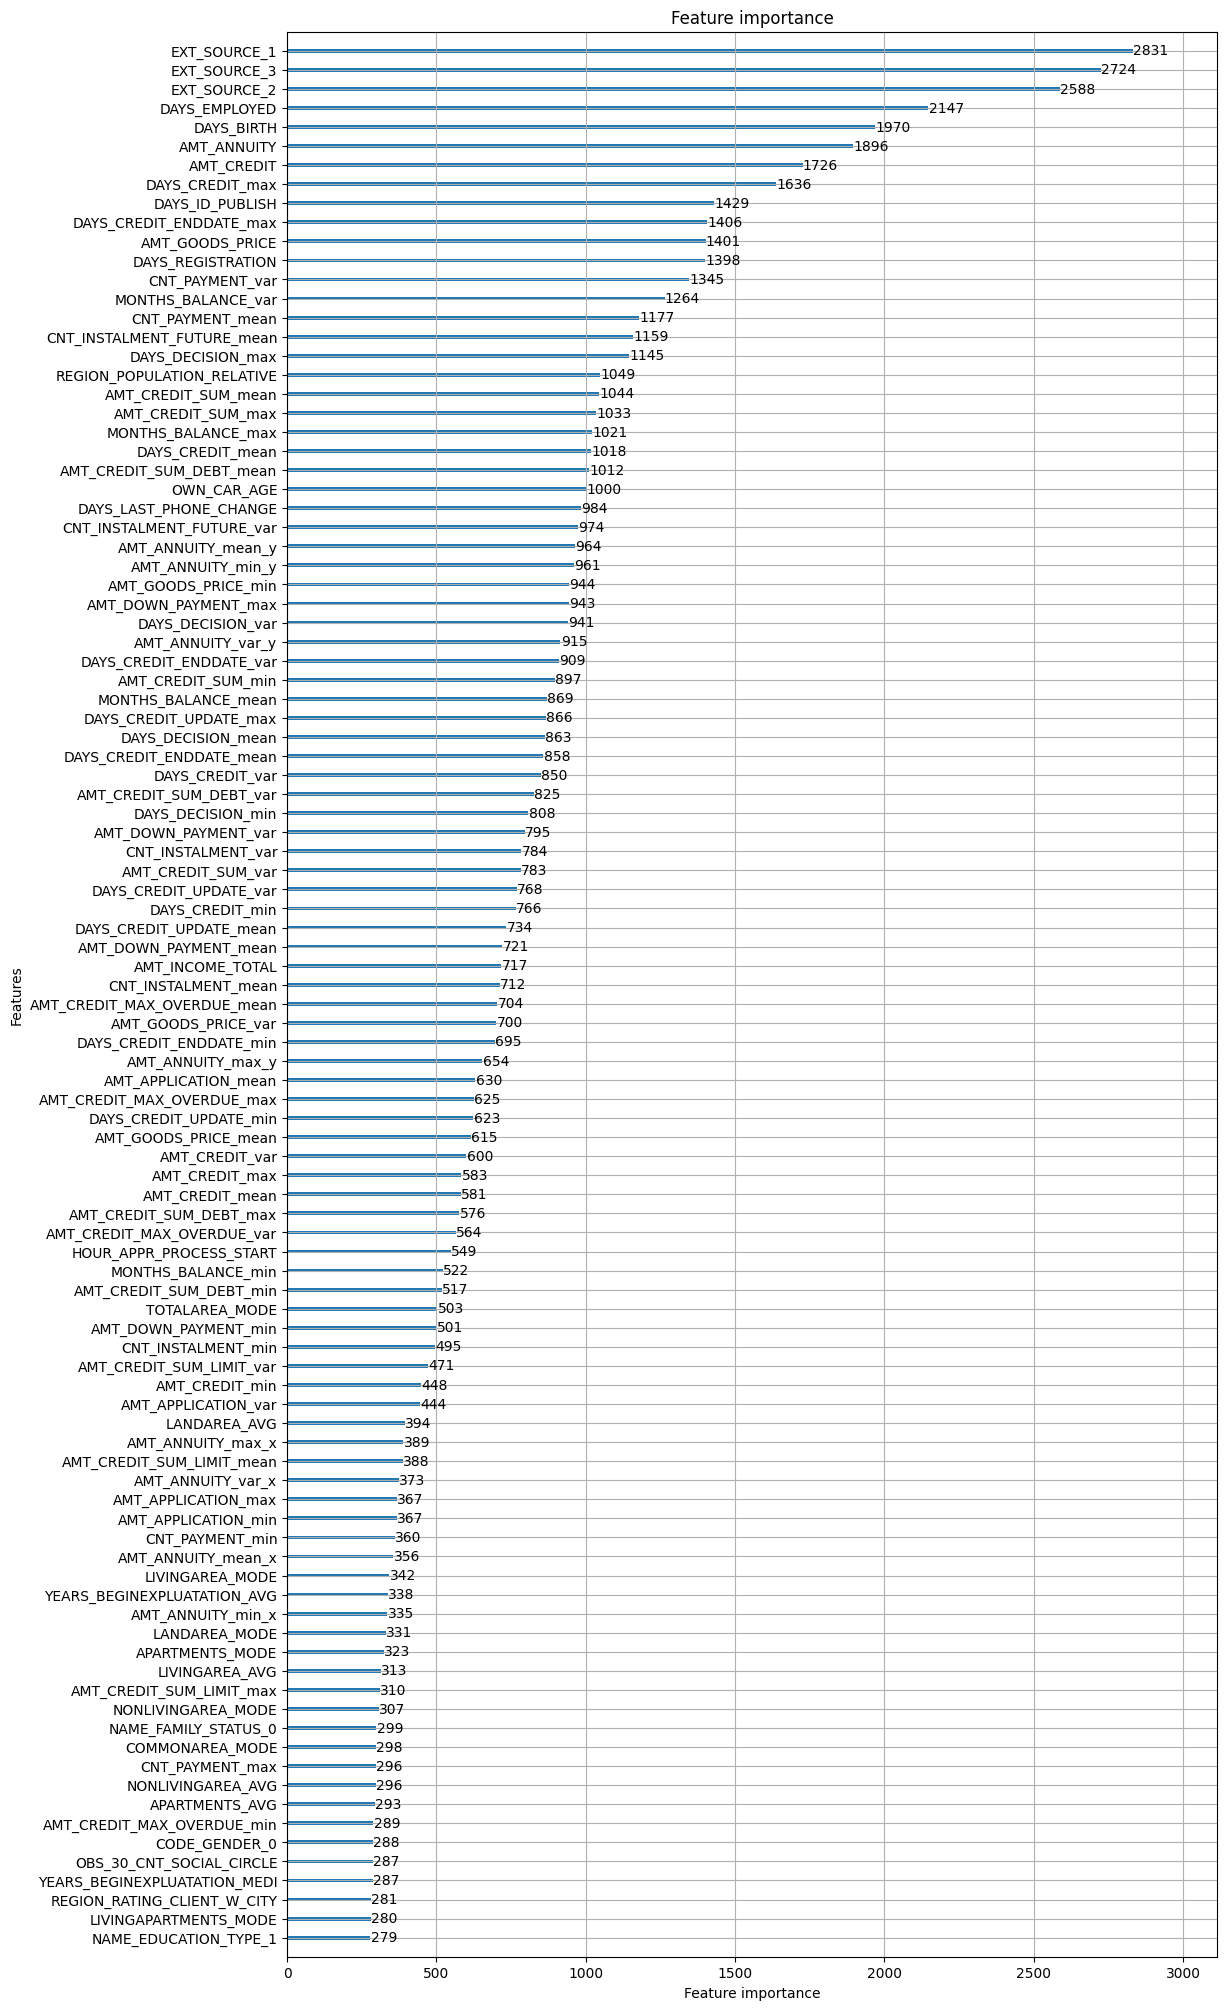

In [592]:
lgb.plot_importance(lgb_model, figsize=(12, 25), max_num_features=100);

In [594]:
preds = lgb_model.predict(test_X)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_model.csv", index=False)
sub_lgb.head()

,SK_ID_CURR,TARGET
0,100001,0.031831
1,100005,0.133087
2,100013,0.022573
3,100028,0.044826
4,100038,0.219110


In [616]:
output_predictions_to_csv(lgb_model,'lgb')

,SK_ID_CURR,TARGET
0,100001,0.031831
1,100005,0.133087
2,100013,0.022573
3,100028,0.044826
4,100038,0.219110


## XGBoost

In [612]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dval = xgb.DMatrix(data=x_val, label=y_val)

# Define parameters
xgb_params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.01,
    'max_depth': 8,
    'subsample': 0.9,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'num_boost_round': 2000
}

# Train the model
xgb_model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=2000, 
                      evals=[(dval, 'validation')], 
                      early_stopping_rounds=10)

c:\Users\gbrown\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:50:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "num_boost_round" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-auc:0.69255
[1]	validation-auc:0.72243
[2]	validation-auc:0.73267
[3]	validation-auc:0.73474
[4]	validation-auc:0.73681
[5]	validation-auc:0.73867
[6]	validation-auc:0.73927
[7]	validation-auc:0.74067
[8]	validation-auc:0.74190
[9]	validation-auc:0.74225
[10]	validation-auc:0.74222
[11]	validation-auc:0.74222
[12]	validation-auc:0.74177
[13]	validation-auc:0.74203
[14]	validation-auc:0.74227
[15]	validation-auc:0.74203
[16]	validation-auc:0.74229
[17]	validation-auc:0.74215
[18]	validation-auc:0.74228
[19]	validation-auc:0.74229
[20]	validation-auc:0.74203
[21]	validation-auc:0.74222
[22]	validation-auc:0.74207
[23]	validation-auc:0.74198
[24]	validation-auc:0.74278
[25]	validation-auc:0.74281
[26]	validation-auc:0.74349
[27]	validation-auc:0.74388
[28]	validation-auc:0.74396
[29]	validation-auc:0.74409
[30]	validation-auc:0.74411
[31]	validation-auc:0.74420
[32]	validation-auc:0.74401
[33]	validation-auc:0.74444
[34]	validation-auc:0.74483
[35]	validation-auc:0.74478
[3

In [619]:
output_predictions_to_csv(xgb_model, 'xgb')

,SK_ID_CURR,TARGET
0,100001,0.119504
1,100005,0.136803
2,100013,0.108056
3,100028,0.115123
4,100038,0.144298


## Random Forest

In [621]:
rf_model = RandomForestClassifier(n_estimators=2000, max_depth=8, random_state=88)

# Train the model
rf_model.fit(x_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict_proba(x_val)[:, 1]
print(f"Random Forest AUC: {roc_auc_score(y_val, y_pred_rf)}")

Random Forest AUC: 0.7310406438169715


In [625]:
preds = rf_model.predict(test_X)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
preds = lgb_model.predict(test_X)
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("lgb_model.csv", index=False)
sub_lgb.head()

In [624]:
output_predictions_to_csv(rf_model, 'rf')

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## ANN

In [628]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation is used for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# Train the model
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=100, batch_size=256, verbose=2)

# Predict probabilities on the validation set
y_pred_val = model.predict(x_val_scaled)

# Compute the AUC score
auc_score = roc_auc_score(y_val, y_pred_val)
print(f"Validation AUC Score: {auc_score:.4f}")

c:\Users\gbrown\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
961/961 - 8s - 8ms/step - AUC: 0.5001 - loss: 0.3489 - val_AUC: 0.5000 - val_loss: 0.2765
Epoch 2/100
961/961 - 1s - 1ms/step - AUC: 0.5004 - loss: 0.2816 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 3/100
961/961 - 1s - 1ms/step - AUC: 0.4990 - loss: 0.2816 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 4/100
961/961 - 1s - 1ms/step - AUC: 0.5015 - loss: 0.2816 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 5/100
961/961 - 1s - 1ms/step - AUC: 0.4997 - loss: 0.2816 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 6/100
961/961 - 1s - 1ms/step - AUC: 0.4990 - loss: 0.2817 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 7/100
961/961 - 1s - 1ms/step - AUC: 0.4979 - loss: 0.2817 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 8/100
961/961 - 1s - 1ms/step - AUC: 0.4984 - loss: 0.2817 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 9/100
961/961 - 1s - 1ms/step - AUC: 0.5009 - loss: 0.2817 - val_AUC: 0.5000 - val_loss: 0.2764
Epoch 10/100
961/961 - 2s - 2ms/step - AUC: 0.4990 - loss: 0.2817 - val_AUC: 0.500

KeyboardInterrupt: 